In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
house_df = pd.read_csv('house_sale_data.csv')
house_df.columns

Index(['sale_id', 'day', 'month', 'sale_price', 'n_bedrooms', 'n_bathrooms',
       'finished_sqft', 'lot_size_sqft', 'n_floors', 'waterfront_indicator',
       'view_index', 'condition_index', 'construction_grade_index',
       'finished_above_ground_sqft', 'finished_below_ground_sqft',
       'year_built', 'year_renovated', 'zipcode', 'latitude', 'longitude'],
      dtype='object')

In [6]:
#Drop 'sale_id' since it is a unique identifier:
house_df.drop(['sale_id'],axis=1,inplace=True)

In [7]:
#Since there is only one bad row I will drop bad value instead of imputing and convert column to numeric:
house_df = house_df[house_df.finished_above_ground_sqft != '≥']
house_df['finished_above_ground_sqft'] = pd.to_numeric(house_df['finished_above_ground_sqft'])

In [5]:
#Compute z-scores to look for outliers in selected variables:
from scipy import stats
house_df_out = house_df[['sale_price', 'n_bedrooms', 'finished_sqft', 'lot_size_sqft', 'finished_above_ground_sqft', 'finished_below_ground_sqft']]
house_df_out.head(10)
z = np.abs(stats.zscore(house_df_out))
print(z)
filtered = (z < 3).all(axis=1)
print(filtered)
new_df = house_df[filtered]
print(new_df.shape)
print(house_df.shape)
#1,103 removed

[[0.86674579 0.39881617 0.97989064 0.22832225 0.73474358 0.65870289]
 [0.00572409 0.39881617 0.53358604 0.18988717 0.46079806 0.24510771]
 [0.98087679 1.47406755 1.42631182 0.12330177 1.22986688 0.65870289]
 ...
 [0.37589805 1.47406755 1.15410379 0.33213559 0.92796242 0.65870289]
 [0.38162094 0.39881617 0.52258114 0.30707553 0.2275441  0.65870289]
 [0.58591271 1.47406755 1.15410379 0.33875067 0.92796242 0.65870289]]
[ True  True  True ...  True  True  True]
(20509, 19)
(21612, 19)


In [ ]:
#Data frames currently: 
#1: hosue-df: full besides dropped row
#2: new_df: z-scored dropped/zipcode category


In [ ]:
#new_df['zipcode'] = new_df['zipcode'].astype('category')

In [20]:
X = house_df[['day', 'month', 'sale_pric''n_bedrooms', 'n_bathrooms',
       'finished_sqft', 'lot_size_sqft', 'n_floors', 'waterfront_indicator',
       'view_index', 'condition_index', 'construction_grade_index',
       'finished_above_ground_sqft', 'finished_below_ground_sqft',
       'year_built', 'year_renovated', 'zipcode', 'latitude', 'longitude']]
y = house_df['sale_price']
print(X)
print(y)

       day  month  n_bedrooms  n_bathrooms  finished_sqft  lot_size_sqft  \
0       13     10           3         1.00           1180           5650   
1        9     12           3         2.25           2570           7242   
2       25      2           2         1.00            770          10000   
3        9     12           4         3.00           1960           5000   
4       18      2           3         2.00           1680           8080   
5       12      5           4         4.50           5420         101930   
6       27      6           3         2.25           1715           6819   
7       15      1           3         1.50           1060           9711   
8       15      4           3         1.00           1780           7470   
9       12      3           3         2.50           1890           6560   
10       3      4           3         2.50           3560           9796   
11      27      5           2         1.00           1160           6000   
12      28  

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(house_df, test_size=0.2, random_state=0)

In [66]:
# A function to split our training data into a training set to train our  model and a validations set, which will be used to validate our model.
def split_vals(a,n):
    return a[:n],a[n:]
# Functions that will help us calculate the RMSE and print the score.
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [67]:
n_valid = 100
n_train = len(train)-n_valid
X_train,X_valid = split_vals(train.drop('sale_price',axis=1),n_train)
y_train,y_valid = split_vals(train['sale_price'],n_train)
X_test = test

In [68]:
rf = RandomForestRegressor(n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print_score(rf)

/Users/bchoskins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bchoskins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[59557.67201932087, 95807.49428149137, 0.9734370879490233, 0.8836420688325457, 0.8099090919584884]


In [70]:
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))

Training set score: 0.97


In [71]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(rf,X_train)
importance[:]

,Importance
construction_grade_index,0.340315
finished_sqft,0.248043
latitude,0.172560
longitude,0.062967
waterfront_indicator,0.033814
year_built,0.028955
lot_size_sqft,0.021442
finished_above_ground_sqft,0.019113
zipcode,0.016271
view_index,0.014708


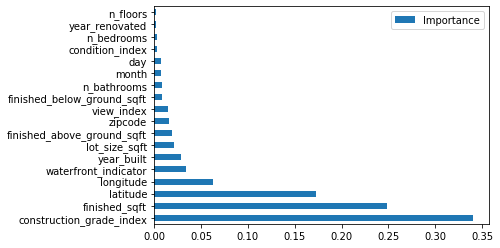

In [72]:
importance.plot(kind='barh')

In [79]:
#Discarding features with feature coefficients less than 0.01
to_keep = importance[importance['Importance'] > 0.025].index
train_keep = train[to_keep].copy()
test_keep = test[to_keep].copy()
#Splitting data into training and validation set
X_train,X_valid = split_vals(train_keep,n_train)
# Fitting our Random Forest Model after discarding the less important features

In [80]:
rf_reduced = RandomForestRegressor(n_jobs=-1, oob_score=True)
rf_reduced.fit(X_train, y_train)
print_score(rf_reduced)

/Users/bchoskins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bchoskins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[61446.05493656078, 139586.96821147832, 0.9717259340674529, 0.7530057879558969, 0.7920451034446874]


In [81]:
def feat_importance(rf_reduced,train_keep):
    importance = rf_reduced.feature_importances_
    importance = pd.DataFrame(importance,index=train_keep.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance

,Importance
construction_grade_index,0.340315
finished_sqft,0.248043
latitude,0.172560
longitude,0.062967
waterfront_indicator,0.033814
year_built,0.028955
lot_size_sqft,0.021442
finished_above_ground_sqft,0.019113
zipcode,0.016271
view_index,0.014708


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
rf3 = RandomForestRegressor()
# Fit the random search model
rf_random = RandomizedSearchCV(estimator = rf3, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [6]:
#Prepare data:
X = new_df[['day', 'month', 'n_bedrooms', 'n_bathrooms',
       'finished_sqft', 'lot_size_sqft', 'n_floors', 'waterfront_indicator',
       'view_index', 'condition_index', 'construction_grade_index',
       'finished_above_ground_sqft', 'finished_below_ground_sqft',
       'year_built', 'year_renovated', 'zipcode', 'latitude', 'longitude']]
y = new_df['sale_price']
print(X)
print(y)

       day  month  n_bedrooms  n_bathrooms  finished_sqft  lot_size_sqft  \
0       13     10           3         1.00           1180           5650   
1        9     12           3         2.25           2570           7242   
2       25      2           2         1.00            770          10000   
3        9     12           4         3.00           1960           5000   
4       18      2           3         2.00           1680           8080   
6       27      6           3         2.25           1715           6819   
7       15      1           3         1.50           1060           9711   
8       15      4           3         1.00           1780           7470   
9       12      3           3         2.50           1890           6560   
11      27      5           2         1.00           1160           6000   
12      28      5           3         1.00           1430          19901   
13       7     10           3         1.75           1370           9680   
14      12  

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
day,-1059.171294
month,-9904.404421
n_bedrooms,-14487.525449
n_bathrooms,19023.362184
finished_sqft,47688.493668
lot_size_sqft,-4676.148744
n_floors,12863.228297
waterfront_indicator,13009.250831
view_index,31801.695950
condition_index,16504.885306


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preds

,Actual,Predicted
9715,485000,738358.910314
19643,650000,867025.494286
6271,625000,471466.859179
20554,416286,505885.351861
7891,406550,472990.170167
464,330000,309527.066943
17692,710000,657045.992278
8901,345000,441669.434707
3845,615000,686541.837421
19766,815000,571479.660646


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_test' is not defined

In [14]:
regressor.score(X_train, y_train)

0.6950568977320464

In [15]:
regressor.score(X_test, y_test)

0.6832373186017168

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

In [ ]:
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

In [ ]:
# get importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [2]:

GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=10, min_samples_split=5, 
                                   loss='huber', random_state =26)

In [14]:
train2 = train.drop(columns=['sale_price'])
GBoost.fit(train2.values, train['sale_price'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             n_iter_no_change=None, presort='auto', random_state=26,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
sorted_importance = sorted(zip(train.columns, GBoost.feature_importances_), key=lambda t:t[1], reverse=True)

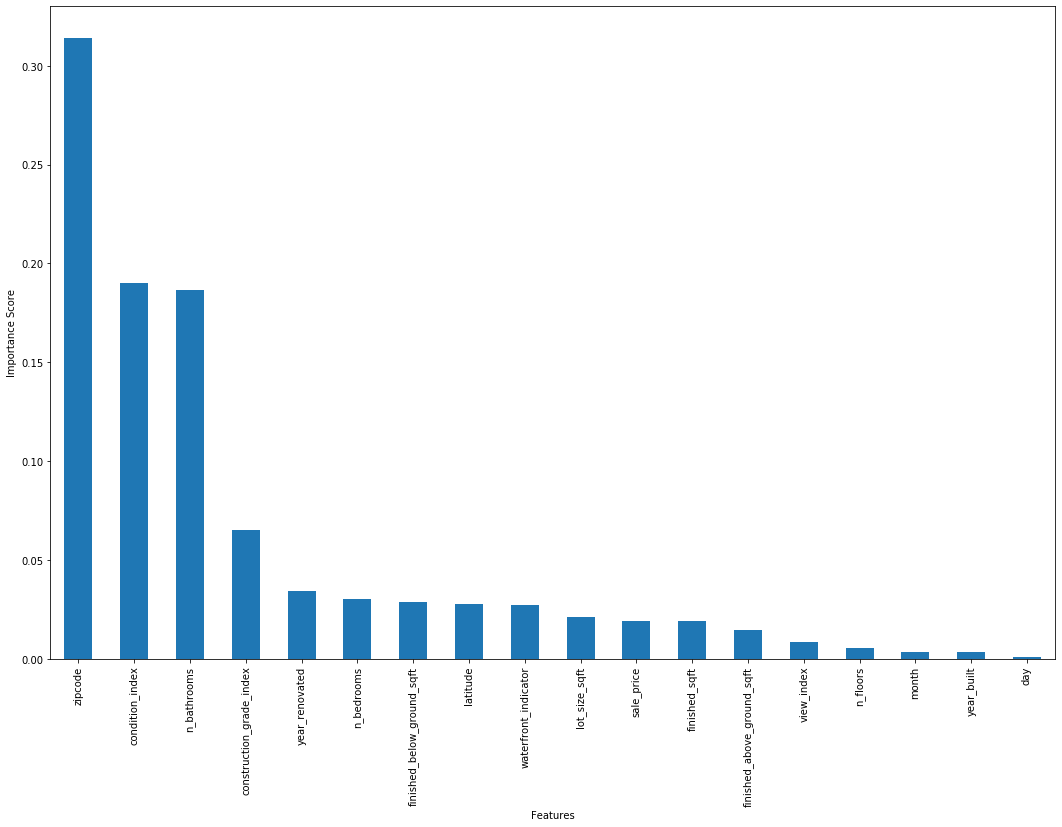

In [16]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
plt.rcParams['figure.figsize'] = (18,12)
pd.DataFrame({'feature_name':a, 'importance_score':b}).head(20).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.savefig('Fea_impor.png',dpi = 250)

In [22]:
from sklearn import metrics
test2 = test.drop(columns=['sale_price'])
metrics.mean_squared_error(test['sale_price'], GBoost.predict(test2))

13426019076.043953